# Boundary vector score (BVS) - datajoint integration

Datajoint integration of bvs calculation

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Set up basics
import sys, os
import numpy as np 
from collections import OrderedDict
# Make plots pretty 
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style='white')
%config InlineBackend.figure_format = 'retina'

import datajoint as dj

In [3]:
# Load base schema
schema = dj.schema(dj.config['dj_imaging.database'])
schema.spawn_missing_classes()

Connecting horsto@kavlidatajoint02.it.ntnu.no:3306


### Schema components

In [4]:
from dj_schemas import *

In [5]:
BVField().progress()

BVField              Completed 9 of 202230 (0.0%)   2020-10-24 10:57:07


(202221, 202230)

In [6]:
BVScore().progress()

BVScore              Completed 0 of 20 (0.0%)   2020-10-24 10:57:10


(20, 20)

In [7]:
BVScore

dj_schemas.bvs.BVScore

### Shuffling

In [8]:
ShuffleParams()

"shuffle_params_id Parameter set ID, starting with A",number_shuffles Expected number of shuffles,"margin_seconds Margin in seconds at start, end of sync samples",break_seconds Break in seconds between sync samples (-> non-continuous sampling of sync stream)
A,500,2.0,0.5


In [ ]:
from dj_schemas.shuffling_bvs import * 

In [10]:
ShuffledBVS.progress()

ShuffledBVS          Completed 0 of 0 (100.0%)   2020-10-24 10:38:52


(0, 0)

In [11]:
ShuffledBVS()

metasession_name Meta session name (hash),session_order Order of session within meta sessions (zero index!),"session_name Session name: Hash of animal_id, datasource_id, timestamp and combined 'yes'/'no' label",signal_dataset 16 character hash,cell_id Cell ID,channel the channel that this trace comes from (ROI masks are always primary),"spike_filter_id Parameter set ID, starting with A",tracking_dataset 16 character hash,"trackingparams_id Parameter set ID, starting with A","shuffle_params_id Parameter set ID, starting with A","s_t_params_id Parameter set ID, starting with A",signal_type Signal type (Fluorescence vs. Spikes),"map_params_id Parameter set ID, starting with A","field_params_id Parameter set ID, starting with A","bvfield_params_id Parameter set ID, starting with A",bv_field_dect_method Specifies how fields were extracted,number_shuffles Total number of shuffles (can vary from expected number),shuffling_offsets Shuffling offsets


In [25]:
BVScore()& 'session_name = "7e888f1d8eaab46b"' & 'cell_id = 80'


metasession_name Meta session name (hash),session_order Order of session within meta sessions (zero index!),"session_name Session name: Hash of animal_id, datasource_id, timestamp and combined 'yes'/'no' label",signal_dataset 16 character hash,cell_id Cell ID,channel the channel that this trace comes from (ROI masks are always primary),"spike_filter_id Parameter set ID, starting with A",tracking_dataset 16 character hash,"trackingparams_id Parameter set ID, starting with A","s_t_params_id Parameter set ID, starting with A",signal_type Signal type (Fluorescence vs. Spikes),"map_params_id Parameter set ID, starting with A","field_params_id Parameter set ID, starting with A","bvfield_params_id Parameter set ID, starting with A",bv_field_dect_method Specifies how fields were extracted,bvs Boundary vector score (BVS),orientation
9eedcb2fc1c0dc44,0,7e888f1d8eaab46b,4ae0645148516a6f,80,primary,A,5dd80548c5fa5e1c,A,A,df_f,A,A,A,opexebo,0.5902217741935484,horizontal
9eedcb2fc1c0dc44,0,7e888f1d8eaab46b,4ae0645148516a6f,80,primary,A,5dd80548c5fa5e1c,A,A,df_f,A,A,A,bvs,0.6838541666666667,horizontal
9eedcb2fc1c0dc44,0,7e888f1d8eaab46b,4ae0645148516a6f,80,primary,A,5dd80548c5fa5e1c,A,A,df_f,B,A,A,opexebo,0.55,vertical
9eedcb2fc1c0dc44,0,7e888f1d8eaab46b,4ae0645148516a6f,80,primary,A,5dd80548c5fa5e1c,A,A,df_f,B,A,A,bvs,0.6961538461538462,horizontal
9eedcb2fc1c0dc44,0,7e888f1d8eaab46b,4ae0645148516a6f,80,primary,A,5dd80548c5fa5e1c,A,A,spikes,A,A,A,opexebo,0.5327620967741935,horizontal
9eedcb2fc1c0dc44,0,7e888f1d8eaab46b,4ae0645148516a6f,80,primary,A,5dd80548c5fa5e1c,A,A,spikes,A,A,A,bvs,0.6834677419354839,horizontal
9eedcb2fc1c0dc44,0,7e888f1d8eaab46b,4ae0645148516a6f,80,primary,A,5dd80548c5fa5e1c,A,A,spikes,B,A,A,opexebo,0.43769230769230766,horizontal
9eedcb2fc1c0dc44,0,7e888f1d8eaab46b,4ae0645148516a6f,80,primary,A,5dd80548c5fa5e1c,A,A,spikes,B,A,A,bvs,0.5984615384615385,horizontal


In [17]:
some_bvs = BVScore * ShuffledBVS.BVS & 'bvs > bvs_99' & 'session_name = "1f20835f09e28706"'
some_bvs

metasession_name Meta session name (hash),session_order Order of session within meta sessions (zero index!),"session_name Session name: Hash of animal_id, datasource_id, timestamp and combined 'yes'/'no' label",signal_dataset 16 character hash,cell_id Cell ID,channel the channel that this trace comes from (ROI masks are always primary),"spike_filter_id Parameter set ID, starting with A",tracking_dataset 16 character hash,"trackingparams_id Parameter set ID, starting with A","s_t_params_id Parameter set ID, starting with A",signal_type Signal type (Fluorescence vs. Spikes),"map_params_id Parameter set ID, starting with A","field_params_id Parameter set ID, starting with A","bvfield_params_id Parameter set ID, starting with A",bv_field_dect_method Specifies how fields were extracted,"shuffle_params_id Parameter set ID, starting with A",bvs Boundary vector score (BVS),orientation,bvs_99 Information rate 99th percentile,bvs_95 Information rate 95th percentile,bvs_shuffles Individual shuffles information rate
5e192857bec0c163,0,1f20835f09e28706,06353f325cdaae7b,0,primary,A,f4e87a651a8b39e7,A,A,df_f,A,A,A,opexebo,A,0.7399193548387097,horizontal,0.735446572580645,0.673891129032258,=BLOB=
5e192857bec0c163,0,1f20835f09e28706,06353f325cdaae7b,15,primary,A,f4e87a651a8b39e7,A,A,df_f,A,A,A,opexebo,A,0.8331653225806451,horizontal,0.7381154233870967,0.6881300403225805,=BLOB=
5e192857bec0c163,0,1f20835f09e28706,06353f325cdaae7b,39,primary,A,f4e87a651a8b39e7,A,A,df_f,A,A,A,opexebo,A,0.8185483870967742,horizontal,0.737036626344086,0.6981350806451613,=BLOB=
5e192857bec0c163,0,1f20835f09e28706,06353f325cdaae7b,49,primary,A,f4e87a651a8b39e7,A,A,df_f,B,A,A,opexebo,A,0.7892307692307693,horizontal,0.6769538461538461,0.6016538461538461,=BLOB=
5e192857bec0c163,0,1f20835f09e28706,06353f325cdaae7b,86,primary,A,f4e87a651a8b39e7,A,A,df_f,B,A,A,opexebo,A,0.8023076923076924,horizontal,0.6860384615384615,0.6402307692307689,=BLOB=
5e192857bec0c163,0,1f20835f09e28706,06353f325cdaae7b,99,primary,A,f4e87a651a8b39e7,A,A,df_f,B,A,A,bvs,A,0.573076923076923,horizontal,0.5210977564102564,0.4523076923076923,=BLOB=
5e192857bec0c163,0,1f20835f09e28706,06353f325cdaae7b,118,primary,A,f4e87a651a8b39e7,A,A,df_f,A,A,A,opexebo,A,0.9380787037037037,vertical,0.7304032258064516,0.674005376344086,=BLOB=
5e192857bec0c163,0,1f20835f09e28706,06353f325cdaae7b,118,primary,A,f4e87a651a8b39e7,A,A,df_f,B,A,A,bvs,A,0.856923076923077,vertical,0.5406923076923079,0.47230769230769226,=BLOB=
5e192857bec0c163,0,1f20835f09e28706,06353f325cdaae7b,123,primary,A,f4e87a651a8b39e7,A,A,df_f,B,A,A,bvs,A,0.7453846153846154,horizontal,0.5861945512820511,0.4981538461538457,=BLOB=
5e192857bec0c163,0,1f20835f09e28706,06353f325cdaae7b,125,primary,A,f4e87a651a8b39e7,A,A,df_f,A,A,A,opexebo,A,0.8732638888888888,vertical,0.7605393145161289,0.7115961021505375,=BLOB=


In [13]:
Session * Session.SessionType & 'sessiontype = "Wheel"'

metasession_name Meta session name (hash),session_order Order of session within meta sessions (zero index!),"session_name Session name: Hash of animal_id, datasource_id, timestamp and combined 'yes'/'no' label",sessiontype Name for Session Type,animal_id,datasource_id,animal_name Animal name in mlims,timestamp Timestamp of session,combined,timeseries_name Timeseries name [e.g. MUnit_0],experiment_type,username NTNU username,note Note for this session
001d0b541f48a7c6,0,001d0b541f48a7c6,Wheel,0cfa0e6d25c0c601,0,60656,2019-04-11 15:31:21,no,MUnit_0,femtonics,flaviod,
0034e4a1a7862daa,0,0034e4a1a7862daa,Wheel,e5ec049c78d410cb,0,60584,2019-01-31 12:12:48,no,MUnit_0,femtonics,flaviod,
0129476ffa0ff93e,0,0129476ffa0ff93e,Wheel,c408ac2469c34874,0,59914,2017-10-03 11:30:00,no,MUnit_0,femtonics,flaviod,
0256bb6ceacde5cb,0,0256bb6ceacde5cb,Wheel,2ed6de719cad476d,0,92229,2020-03-21 10:46:51,no,MUnit_3,femtonics,ragnihiij,
0269cc75d2f5894e,0,0269cc75d2f5894e,Wheel,b876211511551a9c,0,60353,2018-07-26 09:58:06,no,MUnit_0,femtonics,flaviod,
029959830f3e9bf6,0,029959830f3e9bf6,Wheel,37a4a2df172e1270,0,60961,2020-04-09 15:10:07,no,MUnit_1,femtonics,ragnihiij,
02a1b5e966d86b7f,0,02a1b5e966d86b7f,Wheel,3e6fd573de46cf8e,0,60585,2019-01-28 10:32:52,no,MUnit_0,femtonics,flaviod,
02a75ba122bd4519,0,02a75ba122bd4519,Wheel,812949cb630bc4d1,0,87161,2019-04-02 15:42:01,no,MUnit_0,femtonics,flaviod,
02c2eb88e2ca1252,1,c3ce3a4fd206e7e7,Wheel,ae9cd831536bcb98,0,90647,2020-03-01 12:52:55,yes,90647-wheel,2Pminiscope_A,horsto,
0380d3cec30affac,0,0380d3cec30affac,Wheel,ee3b2cfc97d5d544,0,88832,2019-09-16 14:29:13,no,MUnit_0,femtonics,ragnihiij,


In [16]:
PhysicalFile * Session.Data & 'session_name = "0034e4a1a7862daa"' & 'filetype = "TIFRaw"'

dataset_name 16 character hash,filetype Name for filetype,order When among the other files in the dataset?,metasession_name Meta session name (hash),session_order Order of session within meta sessions (zero index!),"session_name Session name: Hash of animal_id, datasource_id, timestamp and combined 'yes'/'no' label",repository_name Short name for repository,file_path File path on repository
045663fbead828da,TIFRaw,0,0034e4a1a7862daa,0,0034e4a1a7862daa,moser_imaging,/Flavio/2P/L9M4/31012019/munit_0/MUnit_0_00001.tif
045663fbead828da,TIFRaw,1,0034e4a1a7862daa,0,0034e4a1a7862daa,moser_imaging,/Flavio/2P/L9M4/31012019/munit_0/MUnit_0_00002.tif
045663fbead828da,TIFRaw,2,0034e4a1a7862daa,0,0034e4a1a7862daa,moser_imaging,/Flavio/2P/L9M4/31012019/munit_0/MUnit_0_00003.tif
045663fbead828da,TIFRaw,3,0034e4a1a7862daa,0,0034e4a1a7862daa,moser_imaging,/Flavio/2P/L9M4/31012019/munit_0/MUnit_0_00004.tif
045663fbead828da,TIFRaw,4,0034e4a1a7862daa,0,0034e4a1a7862daa,moser_imaging,/Flavio/2P/L9M4/31012019/munit_0/MUnit_0_00005.tif
045663fbead828da,TIFRaw,5,0034e4a1a7862daa,0,0034e4a1a7862daa,moser_imaging,/Flavio/2P/L9M4/31012019/munit_0/MUnit_0_00006.tif
045663fbead828da,TIFRaw,6,0034e4a1a7862daa,0,0034e4a1a7862daa,moser_imaging,/Flavio/2P/L9M4/31012019/munit_0/MUnit_0_00007.tif
045663fbead828da,TIFRaw,7,0034e4a1a7862daa,0,0034e4a1a7862daa,moser_imaging,/Flavio/2P/L9M4/31012019/munit_0/MUnit_0_00008.tif
045663fbead828da,TIFRaw,8,0034e4a1a7862daa,0,0034e4a1a7862daa,moser_imaging,/Flavio/2P/L9M4/31012019/munit_0/MUnit_0_00009.tif
045663fbead828da,TIFRaw,9,0034e4a1a7862daa,0,0034e4a1a7862daa,moser_imaging,/Flavio/2P/L9M4/31012019/munit_0/MUnit_0_00010.tif


ValueError: num must be 1 <= num <= 5, not 6

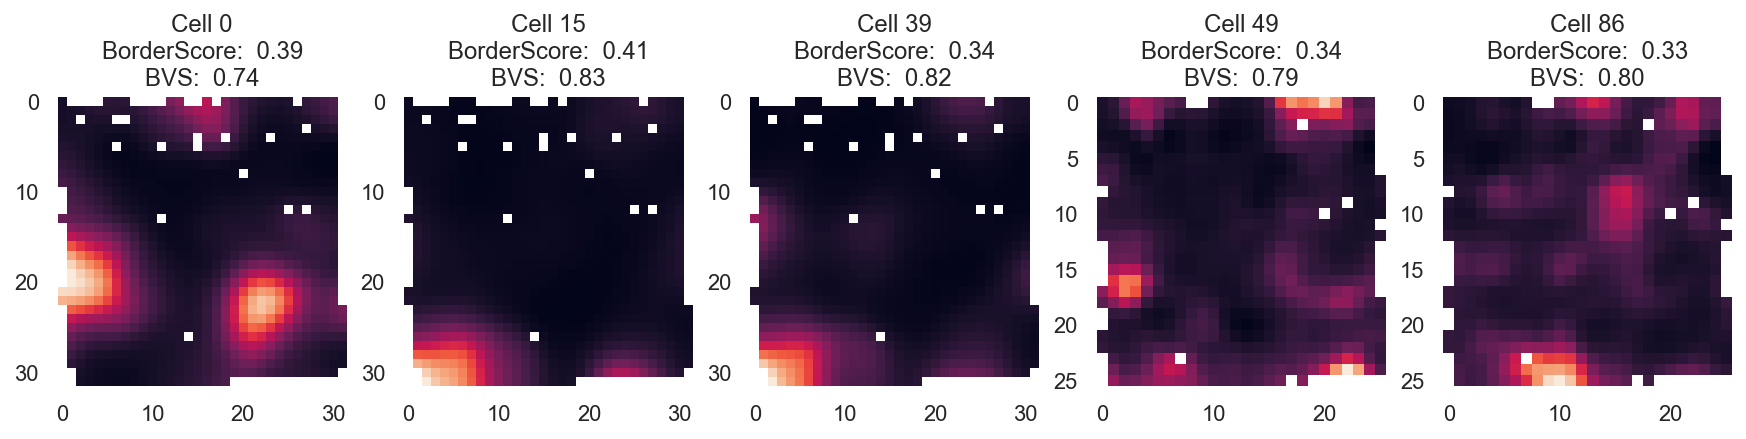

In [18]:
figure = plt.figure(figsize=(15,7))
for no,rm in enumerate(some_bvs):
    ax = figure.add_subplot(1,5,no+1)
    bvs = rm['bvs']
    borderscore = (BorderScore & rm).fetch1("borderscore")
    ratemap_entry = (Ratemap & rm).fetch1()
    rm      = np.ma.array(ratemap_entry['ratemap'], mask = ratemap_entry['mask_rm'])
    rm_nans = np.ma.filled(rm, fill_value=np.nan).astype(np.float64)
    ax.imshow(rm_nans)
    ax.set_title(f'Cell {ratemap_entry["cell_id"]}\nBorderScore:  {borderscore:.2f}\nBVS:  {bvs:.2f}')
    sns.despine(left=True,bottom=True)